In [326]:
import pandas as pd
from pandas import DataFrame
from pandas import to_datetime
import numpy as np

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from prophet import Prophet 
from holidays import WEEKEND, HolidayBase
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd
from dateutil.easter import easter

import statsmodels.api as sm
import os

import warnings
import matplotlib.pyplot as plt 

In [327]:
os.getcwd()

'/Users/franciszekruszkowski/Desktop/CODING/task'

In [328]:
os.chdir('/Users/franciszekruszkowski/Desktop/CODING/task')

## DATASET 

In [329]:
# Import the data

df = pd.read_csv("pageviews-20220101-20220823.csv")
df.head(5)

,Date,Figma (software)
0,2022-01-01,632
1,2022-01-02,742
2,2022-01-03,1134
3,2022-01-04,1217
4,2022-01-05,1378


In [330]:
df = df.rename(columns = {'Date':'date','Figma (software)':'visits'})
df = df.set_index(pd.DatetimeIndex(df['date']))

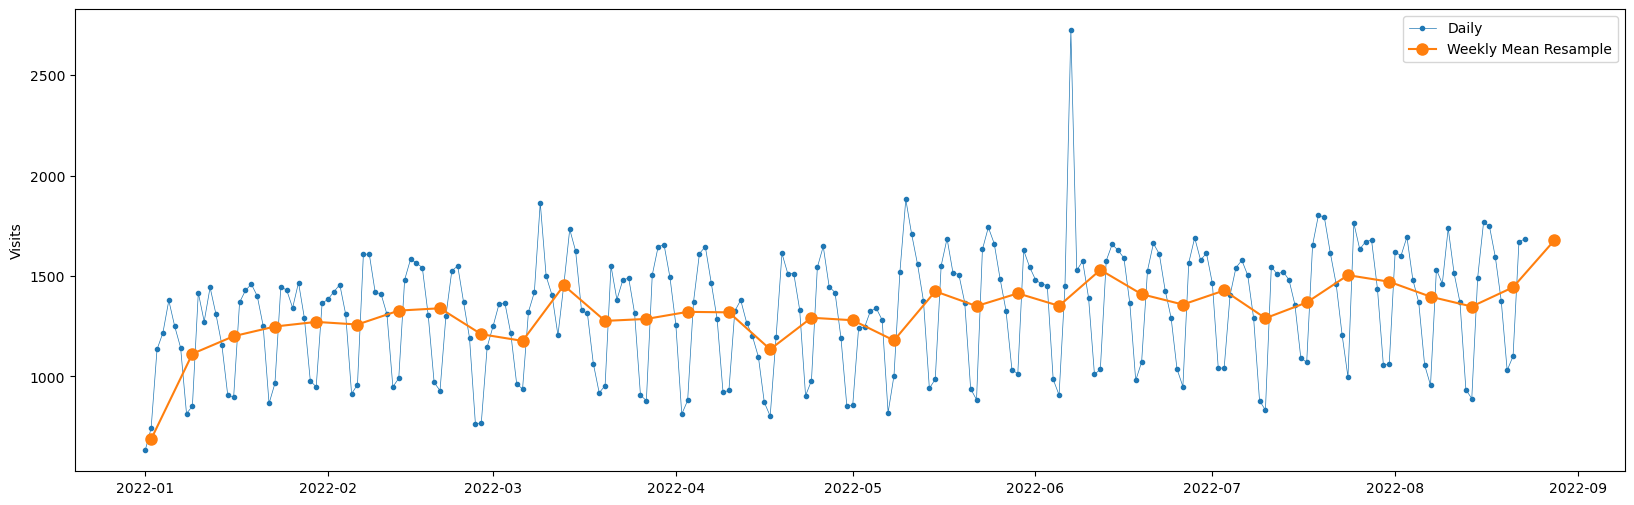

In [331]:
## Plot 

y = df['visits']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(y.resample('W').mean(),marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Visits')
ax.legend();

In [332]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

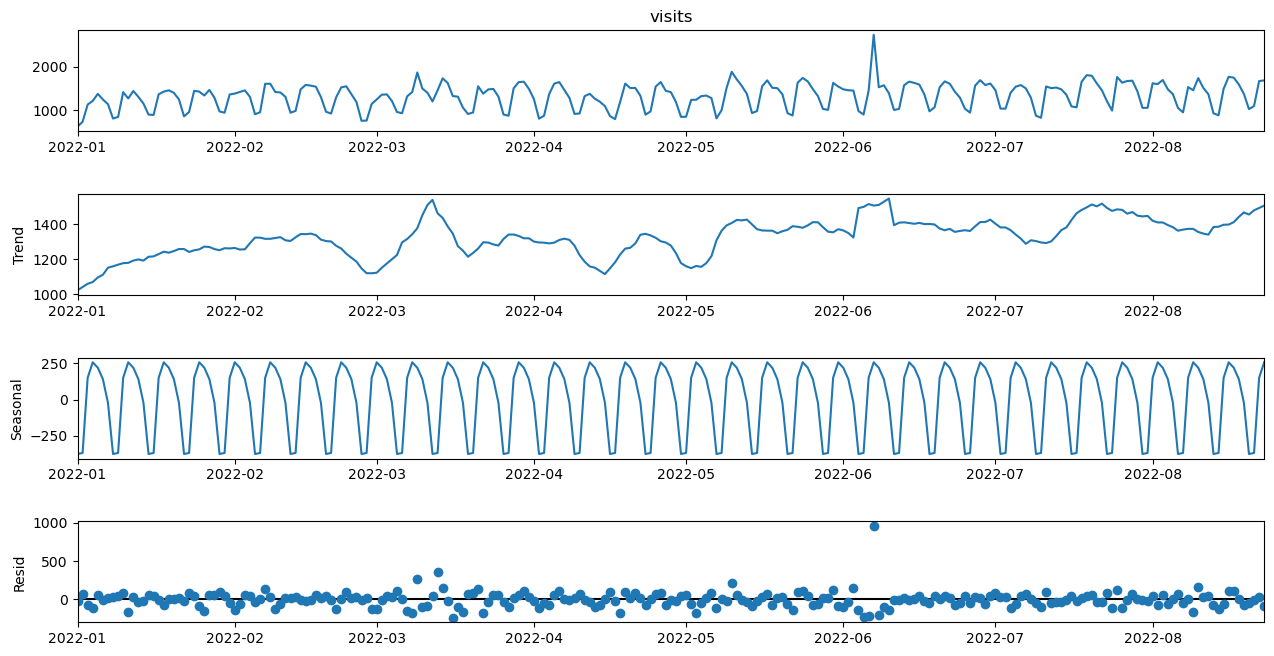

In [333]:
seasonal_decompose(y)

In [334]:
# Import the data for and prepare for Prophet

df = pd.read_csv("pageviews-20220101-20220823.csv")
df = df.rename(columns = {'Date':'ds','Figma (software)':'y'})
df.tail(5)

,ds,y
230,2022-08-19,1375
231,2022-08-20,1030
232,2022-08-21,1100
233,2022-08-22,1670
234,2022-08-23,1684


In [335]:
m = Prophet()
m.fit(df)

17:09:28 - cmdstanpy - INFO - Chain [1] start processing
17:09:28 - cmdstanpy - INFO - Chain [1] done processing


In [336]:
future= m.make_future_dataframe(periods=312)
future.tail(10)

,ds
537,2023-06-22
538,2023-06-23
539,2023-06-24
540,2023-06-25
541,2023-06-26
542,2023-06-27
543,2023-06-28
544,2023-06-29
545,2023-06-30
546,2023-07-01


In [337]:
# forecast
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
542,2023-06-27,1749.385137,1809.384189,2205.813502,1650.429946,1832.788889,257.021103,257.021103,257.021103,257.021103,257.021103,257.021103,0.0,0.0,0.0,2006.406240
543,2023-06-28,1750.377222,1775.436043,2156.477115,1650.935733,1834.126934,218.325289,218.325289,218.325289,218.325289,218.325289,218.325289,0.0,0.0,0.0,1968.702511
544,2023-06-29,1751.369306,1685.585912,2084.118594,1651.441521,1835.548547,140.333944,140.333944,140.333944,140.333944,140.333944,140.333944,0.0,0.0,0.0,1891.703250
545,2023-06-30,1752.361391,1522.244650,1920.292628,1651.947309,1837.192771,-21.135514,-21.135514,-21.135514,-21.135514,-21.135514,-21.135514,0.0,0.0,0.0,1731.225877
546,2023-07-01,1753.353475,1182.791803,1556.958378,1652.453097,1838.836995,-376.622687,-376.622687,-376.622687,-376.622687,-376.622687,-376.622687,0.0,0.0,0.0,1376.730789


In [338]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
542,2023-06-27,2006.406240,1809.384189,2205.813502
543,2023-06-28,1968.702511,1775.436043,2156.477115
544,2023-06-29,1891.703250,1685.585912,2084.118594
545,2023-06-30,1731.225877,1522.244650,1920.292628
546,2023-07-01,1376.730789,1182.791803,1556.958378


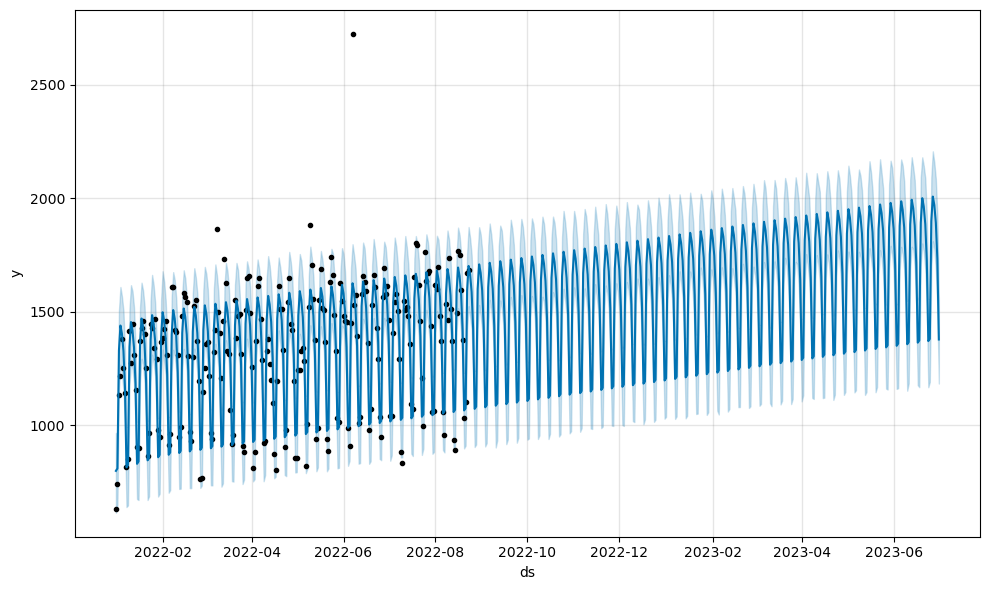

In [339]:
fig1 = m.plot(forecast)

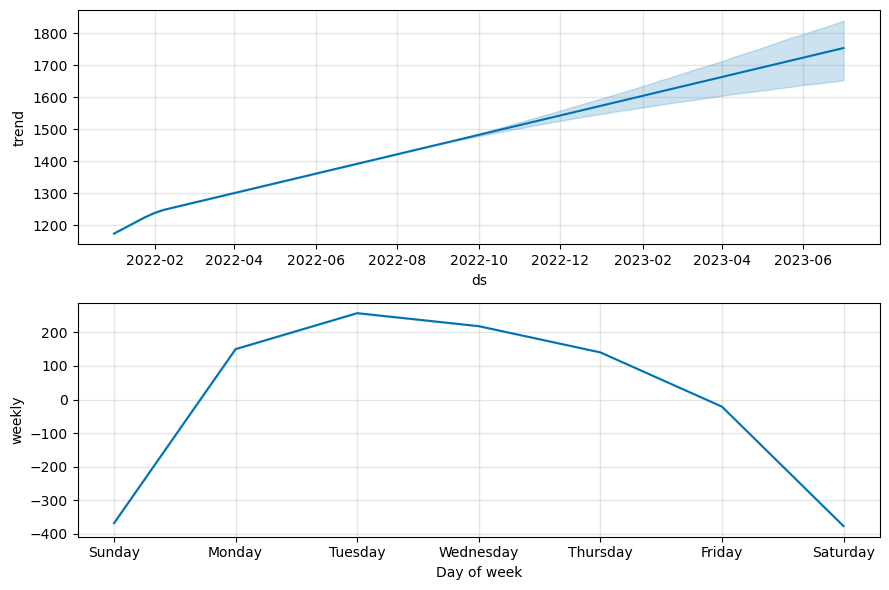

In [340]:
fig2 = m.plot_components(forecast)

## Interactive Plots 

In [341]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [342]:
plot_components_plotly(m, forecast)

### Prediction from day 235 (24th August 2022) for 312 days until day 546 (1st July 2023)

In [343]:
prediction = forecast[['ds', 'yhat']]
prediction = prediction[235:547]
prediction = prediction.rename(columns = {'ds':'Date','yhat':'pred_visits'})
prediction

,Date,pred_visits
235,2022-08-24,1663.140457
236,2022-08-25,1586.141196
237,2022-08-26,1425.663823
238,2022-08-27,1071.168735
239,2022-08-28,1080.772037
...,...,...
542,2023-06-27,2006.406240
543,2023-06-28,1968.702511
544,2023-06-29,1891.703250
545,2023-06-30,1731.225877
